In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

if '..' not in sys.path:
    sys.path.append('..')

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Value-at-Risk Student Prescription Tree
- Use seed=`121` for reproducibility.

In [3]:
from src.teachers.BinomGLM import BinomGLM
from src.DataGenerator import DataGenerator
from src.RiskAverseSPT import RiskAverseSPT 

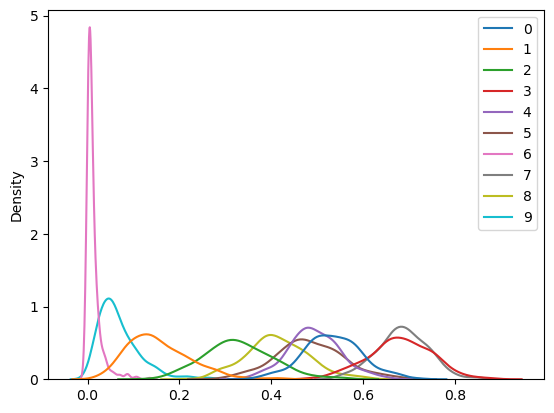

In [4]:
# init
gen = DataGenerator()
glm = BinomGLM()

dataset = 1
n_samples = 100

# load model
glm.load_params(
    f'../data/model=binomglm&dataset={dataset}&n_samples={n_samples}'
)

# get dataset
X, y, price, optimal_price = gen.generate_data(1, n_samples=100, seed=121)

# try inference
r = glm.predict_proba(price=5, X=X)

sns.kdeplot(r[:10, :].T)
plt.show()

In [81]:
# fit VaR-SPT
rat = RiskAverseSPT(teacher=glm, min_samples=10)

# get prices
prices = np.linspace(
    price.quantile(0.05),
    price.quantile(0.95),
    9
)

# fit
rat.fit(X, prices)

In [82]:
print(rat._total_rev(rat.root_node.revenue))

print(
    rat._total_rev(rat.root_node.left.revenue) + \
        rat._total_rev(rat.root_node.right.revenue) 
)

313.2008423326817
321.5383035866834


In [83]:
total_rev, avg_rev = rat.expected_revenue() 

print('Total Revenue:', round(total_rev, 1))
print('Avg Revenue:', round(avg_rev, 2))

Total Revenue: 329.7
Avg Revenue: 3.3


In [80]:
rat.transform(X)

TypeError: '>=' not supported between instances of 'float' and 'NoneType'